# 二項分布モデルでのP値

* 黒木玄
* 2025-11-26
$
\newcommand\op{\operatorname}
$

このファイルは以下の場所で閲覧できる:

* https://github.com/genkuroki/public/blob/main/0055/binomial%20P-values.ipynb
* https://nbviewer.org/github/genkuroki/public/blob/main/0055/binomial%20P-values.ipynb
* https://raw.githubusercontent.com/genkuroki/public/refs/heads/main/0055/binomial%20P-values.pdf

<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#二項検定のP値に関する解説の例" data-toc-modified-id="二項検定のP値に関する解説の例-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>二項検定のP値に関する解説の例</a></span><ul class="toc-item"><li><span><a href="#P値" data-toc-modified-id="P値-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>P値</a></span></li><li><span><a href="#P値の計算の仕方" data-toc-modified-id="P値の計算の仕方-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>P値の計算の仕方</a></span></li><li><span><a href="#両側P値の計算練習問題" data-toc-modified-id="両側P値の計算練習問題-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>両側P値の計算練習問題</a></span></li><li><span><a href="#S値" data-toc-modified-id="S値-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>S値</a></span></li><li><span><a href="#相性の良さ/悪さという解釈の仕方" data-toc-modified-id="相性の良さ/悪さという解釈の仕方-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>相性の良さ/悪さという解釈の仕方</a></span></li><li><span><a href="#P値関数とS値関数" data-toc-modified-id="P値関数とS値関数-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>P値関数とS値関数</a></span></li><li><span><a href="#信頼区間＝相性区間" data-toc-modified-id="信頼区間＝相性区間-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>信頼区間＝相性区間</a></span></li><li><span><a href="#報告の仕方について" data-toc-modified-id="報告の仕方について-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>報告の仕方について</a></span></li></ul></li><li><span><a href="#二項検定の複数のP値のグラフ" data-toc-modified-id="二項検定の複数のP値のグラフ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>二項検定の複数のP値のグラフ</a></span></li></ul></div>

In [1]:
ENV["LINES"] = 200
ENV["COLUMNS"] = 200

const mincho = "ipamp"
const gothic = "ipagp"

using Distributions
using StatsPlots
default(fmt=:png, fontfamily=gothic,
    titlefontsize=13, legendfontsize=13, guidefontsize=13)

x ⪅ y = x < y || x ≈ y
x ⪆ y = x > y || x ≈ y

⪆ (generic function with 1 method)

In [2]:
"""
    central法による二項分布の両側P値
二項分布binにおける「k以下になる確率の2倍」と「k以上になる確率の2倍」の小さい方の値

このP値からClopper-Pearsonの信頼区間が得られる。
"""
pvalue_central(bin, k) = min(2cdf(bin, k), 2ccdf(bin, k-1))

"""
Clopper-Pearsonの信頼区間
"""
function confint_clopper_pearson(n, k; α = 0.05)
    p_L = k > 0 ? quantile(Beta(k, n-k+1), α/2) : zero(α)
    p_U = k < n ? quantile(Beta(k+1, n-k), 1-α/2) : one(α)
    [p_L, p_U]
end

confint_clopper_pearson

In [3]:
"""
    minimum likelihood法による二項分布の両側P値
このP値からSterneの信頼区間が得られる。
"""
function pvalue_minlike(bin, k)
    supp = support(bin)
    sum(pdf(bin, i) for i in supp if pdf(bin, i) ⪅ pdf(bin, k))
end

pvalue_minlike

In [4]:
"""
    score法による二項分布の両側P値
このP値は二項分布の正規分布近似で定義された両側P値と同じ。

このP値はWilsonのscore信頼区間を与える。
"""
function pvalue_score(bin, k)
    (; n, p) = bin
    phat = k/n
    se = sqrt(p * (1 - p) / n)
    z = (phat - p) / se
    2ccdf(Normal(), abs(z))
end

pvalue_score

In [5]:
"""
    Wald法による二項分布の両側P値
このP値も二項分布の正規分布近似で定義された両側P値だが、データ \$n, k\$ から推定する必要がない \$\\hat{p}=k/n\$ の標準偏差を推定してしまっているので、score法の両側P値よりも精度が低い。

このP値は教科書によく書いてある母比率に関するWaldの信頼区間を与える。
"""
function pvalue_wald(bin, k)
    (; n, p) = bin
    phat = k/n
    sehat = sqrt(phat * (1 - phat) / n)
    z = (phat - p) / sehat
    2ccdf(Normal(), abs(z))
end

pvalue_wald

In [6]:
bin = Binomial(20, 0.6)
ks = (7, 8, 16, 17)
@show pvalue_central.(bin, ks)
@show pvalue_minlike.(bin, ks)
@show pvalue_score.(bin, ks)
@show pvalue_wald.(bin, ks)
;

pvalue_central.(bin, ks) = (0.04205785495554228, 0.1130527340685061, 0.10190390638833315, 0.031922325580016536)
pvalue_minlike.(bin, ks) = (0.03699009026777941, 0.10747832022841937, 0.07198088067193767, 0.022427038142043273)
pvalue_score.(bin, ks) = (0.02247887336612527, 0.06788915486182907, 0.06788915486182893, 0.02247887336612527)
pvalue_wald.(bin, ks) = (0.0190763221017784, 0.06788915486182907, 0.025347318677468197, 0.0017414012528258463)


In [7]:
ccdf(Binomial(20, 0.6), 18-1), 2ccdf(Binomial(20, 0.6), 18-1)

(0.003611472059128875, 0.00722294411825775)

In [8]:
cdf(Binomial(20, 0.6), 6), 2cdf(Binomial(20, 0.6), 6)

(0.00646587535203501, 0.01293175070407002)

## 二項検定のP値に関する解説の例

以下の例は中原治著『基礎から学ぶ統計学』の「1-5 二項検定」の節の「5⃣ STEP 4: 棄却域と有意水準」以降の説明をP値に関する説明で置き換えることを意識して書かれたものです。

その本の例題1.1では、B薬は60%の患者に効果があることが分かっていると仮定されており、A薬については無作為に選んだ患者20人中18人に効果があったというデータの値が得られていると仮定されています。以下の説明でもこの設定を使います。

### P値

例題1.1の文脈では、特別な数値でその値の __小ささ__ が次のように解釈できるようなものをデータの値から計算できると便利です:

>A薬が無作為に選んだ患者20人中18人に効いたというデータの値が得られたとき、A薬が効く患者の割合がB薬と同じ60%だと信じている人は確率的にどれだけ意外だと感じるか。

以下では、この目的のために使えるP値という数値の構成の仕方について、例題1.1の場合を例に説明します。

例題1.1の状況では、上の目的のために使える __片側P値__ を

>効果がある患者の割合が60%だと仮定したとき、無作為に選んだ患者20人中18人 __以上__ に効果がある確率

と定義できます。この確率の値(片側P値の値)は0.36%とかなり小さくなります(計算の仕方は後で説明します)。そのことは、「A薬とB薬が効く患者の割合が等しい」と信じている人にとって、「A薬が無作為に選んだ患者20人中18人に効いた」というデータの値はかなり意外だと感じられることを意味しています。

さらに __両側P値__ が上の片側P値の2倍で定義されます。この場合の両側P値は0.72%でやはりかなり小さい。より詳しくは、この両側P値を

>「A薬が無作為に選んだ患者20人中18人に効いた」というデータの値に関する「A薬が効く患者の割合が60%である」という検定仮説の両側P値

と呼びます。検定仮説を単に仮説と呼ぶこともあります。伝統的な用語法では検定仮説は帰無仮説とも呼ばれています。帰無仮説(null hypothesis)は意味が分かり難く、英単語のnullはzeroという意味を持つせいで、差がないことを意味するゼロ仮説を主に意味するかのように誤解されがちなので、この解説では帰無仮説という用語を避けることにします。(検定仮説(test hypothesis)という用語を初期のNeymanが使っていたので、検定仮説もある意味で十分に由緒正しい用語だと考えられる。「検定」は英語のtestの翻訳で「検定仮説」は「データの値とモデルを使ってテストする仮説」というような意味になります。)

両側P値の小ささは

>「A薬が効く患者の割合が60%である」と信じている人が、「A薬が無作為に選んだ患者20人中18人に効いた」ことに感じる意外さ

を表しています。

以下では単にP値と言ったら、両側P値を意味するものとします。

P値は小さいほど、モデルと検定仮説の組み合わせの下でデータの値の意外さが大きいことを意味します。

__P値の報告の仕方:__ P値を $P$ と書くとき、$P < 0.05$ のようにP値の具体的な値が不明になるような報告の仕方をしてはいけません。Ｐ値を報告する場合には $P = 3.2\%$ のように具体的な値がわかるように報告するようにしましょう。ただし、例外的にP値が $P=0.000023=2.3\mathrm{e-}5$ のように非常に小さな値になり、近似計算の精度を超えている場合には $P < 0.0001$ のように報告しても良いでしょう。$P=0.04205785495554228$ のように無意味に高過ぎる精度でP値を報告してもいけません。複雑な現実における統計分析では、理想的なデータの取得は不可能だったり、統計分析のために採用する統計モデルの妥当性自体が不明だったりするので、高精度なP値の値には意味がないと考えられます。一般に、統計分析の結果を報告するときには、P値などの統計分析で得られる数値では測ることができないバイアスや不確実性があることを謙虚に認めることが必要になります。この解説ではP値(P-value)のPを大文字で書くことにしたのですが、小文字の$p$と書いても問題ありません。どちらでもよいです。

以下の注意は最初に読むときにはとばしても構いません。

__片側確率の2倍の両側P値の正確な定義と欠点:__ 「無作為に選んだ $n$ 人中 $k$ 人に薬が効いた」というデータの値が得られたときの、片側確率の2倍で定義された「薬が効く患者の割合は$p$である」という仮説の両側P値の正確な定義は

>薬が効く確率が $p$ であるという仮定の下で、無作為に選んだ $n$ 人中 $k$ 人以上に効く確率の2倍と無作為に選んだ $n$ 人中 $k$ 人以下に効く確率の小さい方の値

です。このように定義された両側P値の欠点は

* 無用に値が大きくなり過ぎるという性質を持つ。
* $1$ より大きくなることがある。

P値は確率だとみなしたい値なので0以上1以下になって欲しいのですが、上の定義だと1より大きくなってしまう場合が出て来てしまいます。その欠点をなくすために、

>薬が効く確率が $p$ であるという仮定の下で、無作為に選んだ $n$ 人中 $k$ 人以上に効く確率の2倍と無作為に選んだ $n$ 人中 $k$ 人以下に効く確率と __1__ の中での最小値

と定義することも多いです。

__片側P値だけではなく、両側P値を考えたくなる理由:__ A薬が無作為に選んだ患者20人中60%の12人よりもずっと大きな人数(例えば18人)に効果があった場合だけではなく、その反対側のずっと小さな人数(例えば5人)にしか効果がない場合にも、A薬が効く患者の割合が60%だと信じている人にとっては意外だと感じられるでしょう。このことから、無作為に選んだ患者20人中60%の12人からデータの値以上に離れる確率の小ささで、「A薬が効く患者の割合は60%」という仮説を信じている人から見たデータの値の意外さを評価するという考え方も自然だということに気付きます。そのような考え方で定義されるP値が両側P値です。上ではシンプルに反対側の確率はもとの片側確率に等しいだろうという大雑把な想定のもとで、片側確率の2倍で両側P値を定義しました。モデルの確率分布が左右非対称な場合には他にも無数の選択肢があるのですが、そういう問題については統計学の技術的側面についてもっと詳しくなってから考えれば十分です。

__尤度とP値の違いに注意:__ 上では片側P値を「効果がある患者の割合が60%であると仮定したとき、無作為に選んだ患者20人中18人 __以上__ に効果がある確率」と定義し、両側P値をその2倍で定義しました。読者の中には太字になっている「以上」を削除して、「効果がある患者の割合が60%であると仮定したとき、無作為に選んだ患者20人中18人に効果がある確率」を考えたくなる人がいると思います。その人は鋭い！ 「以上」の語を取り去ってできる確率は __尤度(ゆうど)__ と呼ばれており、統計分析における最も基本的かつ重要な量になっています。尤度とP値を混同しないように注意して下さい。

__尤度についてさらに補足:__ 「効果がある患者の割合が60%である」という仮説を信じている人が「無作為に選んだ患者20人中18人に効果があった」というデータの値を見たときには、シンプルに「効果がある患者の割合が60%であると仮定したとき、無作為に選んだ患者20人中18人に効果がある確率」(=尤度(ゆうど))を __モデルとデータの値を比較するための尺度__ として使いたくなると思います。そのアイデアは極めて正しく、尤度は __モデルがどれだけデータの値に適合しているか__ を表していると解釈でき、 __最尤法 (maximum likelihood method)__ の基礎になります。そして尤度をさらに有効利用するための __ベイズ統計__ の方法に発展する考え方にもなっています。非常に残念なのですが、この解説では詳しく触れないことにします。

__統計分析は何をやっているか:__ 現代ではコンピュータにデータの値を入力するだけで統計分析の結果を出力してくれる便利な統計ソフトが普及しています。統計ソフトのユーザーは、それが出力してくれる統計分析の結果が

>モデル(仮説の集まり)とデータの値の間の関係を定量的に記述した結果

に過ぎないことに常に注意する必要があります。P値、点推定値、区間推定値、ベイズ統計での事後分布とその要約などはすべて

>モデル(仮説の集まり)とデータの値の間の関係を定量的に記述した結果

に過ぎません。だから、統計ソフトが出力結果を利用する場合には、

* どのようにして得たどのようなデータの値をモデルと比較したか？
* どのようなモデル(仮説の集まり)とデータの値を比較したか？
* モデル(仮説の集まり)とデータの値のどのような関係を定量化したか？

の3つを理解しておく必要があります。これは実はかなり厳しい要請で、この3つのどれについても十分に理解せずに統計ソフトを使っている人達も結構いるように思われます。この解説の読者はそうならないようにして欲しいと思います。

### P値の計算の仕方

以下では二項係数を

$$
\binom{n}{k} = {}_nC_k = \frac{n!}{k!(n-k)!}
$$

と表すことにします。例えば, $0!=1$ に注意すると、

$$
\begin{aligned}
&
\binom{20}{20} = \frac{20!}{20!0!} = \frac{20!}{20!} = 1,
\\ &
\binom{20}{19} = \frac{20!}{19!1!}
=\frac{20\cdot 19\cdot 18\cdots 2\cdot 1}{19\cdot 18\cdots 2\cdot 1\times 1}
= 20,
\\ &
\binom{20}{18} = \frac{20!}{18!2!}
=\frac{20\cdot 19\cdot 18\cdot 17\cdots 2\cdot 1}{18\cdot 17\cdots 2\cdot 1\times 2}
= 190.
\end{aligned}
$$

${}_nC_k$ は高校数学では標準的な記号ですが、専門的な文献では $\binom{n}{k}$ の方がよく使われているように思われるので主に $\binom{n}{k}$ を使います。どちらを使うかは好みの問題でしかないので、$\binom{n}{k}$ という書き方が嫌いな人は ${}_nC_k$ と書いても構いません。

片側P値と呼ばれる

>効果がある患者の割合が60%だと仮定したとき、無作為に選んだ患者20人中18人 __以上__ に効果がある確率

は次のように計算される。

* (20人中$k$人に効果がある確率) $= \binom{20}{k}0.6^{k}(1-0.6)^{20-k}$

なので、関数電卓その他を使って計算すると、

* (20人中20人に効果がある確率) $= \binom{20}{20}0.6^{20}(1-0.6)^0 = 0.6^{20} \approx 3.6561584400629733\mathrm{e-}5$
* (20人中19人に効果がある確率) $= \binom{20}{19}0.6^{20}(1-0.6)^1 = 20\cdot 0.6^{19}\cdot 0.4 \approx 0.003087422682719845$
* (20人中18人に効果がある確率) $= \binom{20}{18}0.6^{20}(1-0.6)^2 = 190\cdot 0.6^{18}\cdot 0.4^2 \approx 0.00048748779200839646$

ここで $3.6561584400629733\mathrm{e-}5$ は $3.6561584400629733\times 10^5$ を意味する。

上の3つの値の和を計算ことによって次を得る:

* (片側P値)＝(20人中18人以上に効果がある確率) $\approx 0.003611472059128871$

両側P値はこれの2倍なので、

* (両側P値) $= 0.007222944118257742$

以上によって片側P値は約0.36%で両側P値は約0.72%になることが分かった.

In [9]:
@show p20 = binomial(20, 20) * 0.6^20 * 0.4^0
@show p19 = binomial(20, 19) * 0.6^19 * 0.4^1
@show p18 = binomial(20, 18) * 0.6^18 * 0.4^2
@show pval_one_sided = p20 + p19 + p18
@show pval_both_sided = 2pval_one_sided;

p20 = binomial(20, 20) * 0.6 ^ 20 * 0.4 ^ 0 = 3.6561584400629733e-5
p19 = binomial(20, 19) * 0.6 ^ 19 * 0.4 ^ 1 = 0.00048748779200839646
p18 = binomial(20, 18) * 0.6 ^ 18 * 0.4 ^ 2 = 0.003087422682719845
pval_one_sided = p20 + p19 + p18 = 0.003611472059128871
pval_both_sided = 2pval_one_sided = 0.007222944118257742


### 両側P値の計算練習問題

__問題:__ 「薬Aが効く患者の割合は60%である」という仮定の下で「薬Aは無作為抽出された20人中$k$人に効いた」というデータの値が得られる確率$P(k)$を0以上20以下のすべての整数$k$について求め、確率の数表を作成せよ。

__解答例:__ 二項分布の確率 $P(k) = \binom{20}{k} 0.6^k 0.4^{20-k}$ を $k=0,1,2,\ldots,20$ について求めればよい. その結果は次のようになる:

|k|P(k)||k|P(k)|
|---:|:---|---|---:|:---|
|0 | 1.09951e-8|　|12 | 0.179706|
|1 | 3.29853e-7||13 | 0.165882|
|2 | 4.70041e-6||14 | 0.124412|
|3 | 0.0000423037||15 | 0.074647|
|4 | 0.000269686||16 | 0.0349908|
|5 | 0.00129449||17 | 0.0123497|
|6 | 0.00485435||18 | 0.00308742|
|7 | 0.0145631||19 | 0.000487488|
|8 | 0.0354974||20 | 0.0000365616|
|9 | 0.0709949||||
|10 | 0.117142||||
|11 | 0.159738||||

ただし、1.09951e-8は1.09951×10⁻⁸を意味する。以上の結果はWolframAlphaに

```mathematica
Table[k, {k, 0, 20}], Table[Binomial[20, k]*0.6^k*0.4^(20-k), {k, 0, 20}] *2
```

と入力することによって得られる([WolframAlphaで実行](https://www.wolframalpha.com/input?i=Table%5Bk%2C+%7Bk%2C+0%2C+20%7D%5D%2C+Table%5BBinomial%5B20%2C+k%5D*0.6%5Ek*0.4%5E%2820-k%29%2C+%7Bk%2C+0%2C+20%7D%5D+&lang=ja)).

<img width=70% src="https://raw.githubusercontent.com/genkuroki/public/refs/heads/main/0055/WolframAlpha%EF%BC%BFBinomial_20_0.6.png">

In [10]:
Any[0:11 pdf.(Binomial(20, 0.6), 0:11) 12:23 pdf.(Binomial(20, 0.6), 12:23)]

12×4 Matrix{Any}:
  0  1.09951e-8   12  0.179706
  1  3.29853e-7   13  0.165882
  2  4.70041e-6   14  0.124412
  3  4.23037e-5   15  0.074647
  4  0.000269686  16  0.0349908
  5  0.00129449   17  0.0123497
  6  0.00485435   18  0.00308742
  7  0.0145631    19  0.000487488
  8  0.0354974    20  3.65616e-5
  9  0.0709949    21  0.0
 10  0.117142     22  0.0
 11  0.159738     23  0.0

__問題:__ 「薬Aは無作為に抽出された患者20人中6人に効いた」というデータの値に関する「薬Aが効く患者の割合は60%である」という仮説の両側P値を求めよ。ただし、その両側P値は片側確率の2倍で定義されたものとする。その計算で上の問題で作成した確率の数表を用いて良い。

__解答例:__ 求めるべき両側P値は、「薬Aが効く患者の割合は60%である」という仮定の下で「薬Aが効いた人数は無作為抽出された20人中6人以下であった」となる確率の2倍である。ゆえに、求めたい両側P値は、上の問題で求めた確率$P(k)$を$k=0,1,2,3,4,5,6$について足し合わせて2倍すれば求まる。

In [11]:
(1.09951e-8 +
3.29853e-7 + 
4.70041e-6 + 
0.0000423037 + 
0.000269686 + 
0.00129449 + 
0.00485435) * 2

0.012931741916200001

「薬Aは無作為に抽出された患者20人中6人に効いた」というデータの値に関する「薬Aが効く患者の割合は60%である」という仮説の両側P値は約1.3%である。

この値はかなり小さめなので、「薬Aが効く患者の割合は60%である」という仮説の下で「薬Aは無作為に抽出された患者20人中6人に効いた」というデータの値はかなり意外だとみなされる。

In [12]:
pvalue_central(Binomial(20, 0.6), 6)

0.01293175070407002

__問題:__ 「薬Aは無作為に抽出された患者20人中15人に効いた」というデータの値に関する「薬Aが効く患者の割合は60%である」という仮説の両側P値を求めよ。ただし、その両側P値は片側確率の2倍で定義されたものとする。その計算で上の問題で作成した確率の数表を用いて良い。

解答例: $P(k)$ の $k=15,16,17,18,19,20$ に関する和の2倍を計算すれば良い.

In [13]:
(0.074647 +
0.0349908 +
0.0123497 +
0.00308742 +
0.000487488 +
0.0000365616) * 2

0.25119793920000005

「薬Aは無作為に抽出された患者20人中15人に効いた」というデータの値に関する「薬Aが効く患者の割合は60%である」という仮説の両側P値は約25%である。

この25%のP値はかなり大きな値なので、「薬Aが効く患者の割合は60%である」という仮説の下で「薬Aは無作為に抽出された患者20人中15人に効いた」というデータの値をほとんど意外ではないと考えられる。

### S値

以下では、「無作為に選んだ患者$n$人中$k$人に薬Aが効いた」というデータの値に関する「薬Aが効く患者の割合は$p$である」という仮説の(両側)P値を以下では $P$ と書くことにします。

P値 $P$ の値が小ささは、「薬Aが効く患者の割合は$p$である」という仮説を信じている人が「無作為に選んだ患者$n$人中$k$人に薬Aが効いた」というデータの値を意外だと感じる程度を表すのでした。

意外さの程度は偏りがないコイン投げに例えると分かり易くなります。

例えば、偏りのないコイン投げで4回続けて表が出る確率は $6.25\%\approx 6\%$ である。だから、$P\approx 6\%$ であることは、

>「薬Aが効く患者の割合は$p$である」と信じている人が「無作為に選んだ患者$n$人中$k$人に薬Aが効いた」というデータの値について感じる意外さ

が

>偏りがないコイン投げで __4__ 回続けて表が出たのと同じ程度の意外さ

だとみなされることを意味していると考えられます。

同様に $P\approx 3\%$ であることは、上と同じ意味での意外さが

>偏りがないコイン投げで __5__ 回続けて表が出たのと同じ程度の意外さ

だとみなされることを意味していると考えられます。

便宜的にコイン投げの回数として非整数も許されることにすれば、$P\approx 5\%$ であることは、上と同じ意味での意外さが

>偏りがないコイン投げで __4.3__ 回続けて表が出たのと同じ程度の意外さ

だとみなされることを意味していると考えられます。実際、

$$
(1/2)^{4.3} \approx 0.05.
$$

より正確には $(1/2)^{4.3} \approx 0.050765774772264724$.

P値 $P$ に対して以上のようにして決まる偏りがないコイン投げで連続して表が出る回数を $S$ は次のように得られます:

$$
(1/2)^S = P \quad\text{すなわち}\quad S = -\log_2 P.
$$

この $S$ をP値 $P$ に対応する __S値 (意外度、surprisal value)__ と呼ばれています。

S値は曖昧な「P値の小ささ」=「意外さ」という言い方で語られる概念の定量化だと考えられます。つまり、S値が大きさは「意外さ」の大きさそのものだと解釈されます。

P値とS値の対応は以下の通り。

|P値|S値(意外度)|
|:---|---:|
|100%|0|
|50%|1|
|25%|2|
|約12%|約3|
|約6%|約4|
|約3%|約5|
|約1.5%|約6|
|約0.8%|約7|
|約0.4%|約8|
|約0.2%|約9|
|約0.1%|約10|

情報理論的にS値の単位は __ビット__ だと考えらます。

P値の違いの大きさの違いは、対応するS値の側で何ビット違うかを見ると誤解し難くなります。

例えば、$6\%$ と $3\%$ のP値はそれぞれ約 $4$ と $5$ のS値に対応し、1ビットの違いしかありません。伝統的にP値については $5\%$ の閾値が採用されていて、$P < 5\%$ であるか否かによって正反対の結論を出す悪しき慣習があるのですが、$6\%$ と $3\%$ のP値はS値で見たら1ビットの違いしかないので、$P < 5\%$ であるか否かによって正反対の結論を出すことの不合理さもS値を理解すれば分かります。

__広く通用するP値に関する閾値は存在しない:__ $P < 5\%$ であるか否かによる「有意差あり/なし」の二分法に強く執着している人達は、P値に閾値をどうしても設けたいと感じるかもしれません。しかし、仮に閾値の設定が有効な道具として機能するとしても、ケースバイケースで適切な閾値は異なると考えられます。検定仮説が諸々の理由で非常に確からしい場合にはその否定のためのP値の閾値は非常に小さくすることが妥当だと考えられるし、逆に検定仮説が非常に疑わしい場合にはその否定のためのP値の閾値は10%のような大きめの値にしても十分に合理的になることがあり得ます。さらに統計分析の結果を用いた意思判断においても、場合ごとに許容できるリスクの大きさと種類は異なります。そういう諸々の事情を全部無視して慣用的な1つの閾値で押し通そうとすることは科学的に不合理な行為だと考えられます。

### 相性の良さ/悪さという解釈の仕方

「無作為に選んだ患者 $n$ 人中 $k$ 人に薬Aが効いた」というデータの値に関する「薬Aが効く患者の割合は $p$ である」という仮説の(両側)P値 $P$ の小ささとそれに対応するS値 $S=-\log_2 P$ は

>「薬Aが効く患者の割合は $p$ である」という仮説を信じている人が「無作為に選んだ患者 $n$ 人中 $k$ 人に薬Aが効いた」というデータの値に感じる意外度

という意味を持っているのでした。これと同じ意味で、P値の小ささ(＝S値の大きさ)を

>二項分布モデルとそのパラメータに関する「薬Aが効く患者の割合は $p$ である」という検定仮説と「無作為に選んだ患者 $n$ 人中 $k$ 人に薬Aが効いた」というデータの値の __相性の悪さ (incompatibility)__ の尺度

と解釈することにします。このとき、P値の大きさ(＝S値の小ささ)は

>二項分布モデルとそのパラメータに関する「薬Aが効く患者の割合は $p$ である」という検定仮説と「無作為に選んだ患者 $n$ 人中 $k$ 人に薬Aが効いた」というデータの値の __相性の良さ (compatibility)__ の尺度

と解釈されます。以上の言い方も便利なのでこれから使って行くことにします。

### P値関数とS値関数

「無作為に選んだ患者 $n$ 人中 $k$ 人に薬Aが効いた」というデータの値に関する「薬Aが効く患者の割合は $p$ である」という仮説の(両側)P値 $P$ は $k,n,p$ の関数なので、それを

>$\op{pvalue}(k|n,p) =$ ($k,n,p$ に関する両側P値)

と書くことにします。

データの値 $k,n$ が与えられたとき, P値 $\op{pvalue}(k|n,p)$ は $p$ だけの関数になる。そのとき $p$ にP値 $\op{pvalue}(k|n,p)$ を対応させる関数を __P値関数 (P-value function)__ と呼ばれています。

例題1.1の状況では、検定仮説が「薬Aが効く患者の割合は $p=0.6$ である」に固定されていました。パラメータ $p$ の仮説値を固定せずに動かしながらP値を計算して、P値関数のグラフを描けば、パラメータ $p$ のすべての仮説値と「無作為に選んだ患者 $n$ 人中 $k$ 人に薬Aが効いた」というデータの値の相性の良さ(compatibility)の様子が分かることになります。

しかし、P値関数のグラフを得るためには、コンピュータでグラフを描くスキルが必要になります。以下では、この解説の筆者がコンピュータで作成したP値関数のグラフの例を示しましょう。

次のセルのコードで描かれたのは「無作為に選んだ患者 $n=20$ 人中 $k=6$ 人に薬Aが効いた」というデータに対応するP値関数のグラフです。

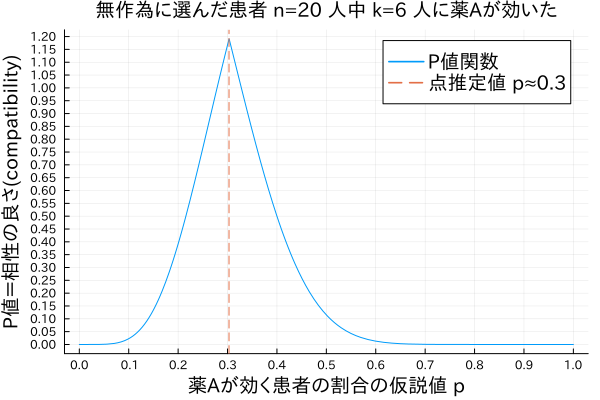

In [14]:
n, k = 20, 6
plot(p -> pvalue_central(Binomial(n, p), k), 0, 1; label="P値関数")
plot!(xtick=0:0.1:1, ytick=0:0.05:1.5, yguide="P値＝相性の良さ(compatibility)")
title!("無作為に選んだ患者 n=$n 人中 k=$k 人に薬Aが効いた")
plot!(xguide="薬Aが効く患者の割合の仮説値 p")
vline!([0.303]; label="点推定値 p≈0.3", ls=:dash)

このP値の大きさは、薬Aが効く患者の割合のすべての仮説値 $p$ と「無作為に選んだ患者 $n=20$ 人中 $k=6$ 人に薬Aが効いた」というデータの値の相性の良さが分かります。

例えば、このP値関数の最大値は $p\approx 0.3$ で与えられるので、「無作為に選んだ患者 $n=20$ 人中 $k=6$ 人に薬Aが効いた」というデータの値と最も相性が良い検定仮説は「薬Aが効く患者の割合は $p\approx 0.3$ である」であることが分かります。

このようにP値関数を最大化するパラメータの値 $p\approx 0.3$ は(P値関数から得られる)パラメータ $p$ の __点推定値 (point estimate)__ と呼ばれます。

P値関数が最大になる点推定値 $p\approx 0.3$ から $p$ が離れれば離れるほどP値は小さくなるので、そのような $p$ の仮説値とデータの値の相性は悪くなります。

例えば、「薬Aが効く患者の割合は $p=0.05$ である」や「薬Aが効く患者の割合は $p=0.65$ である」という検定仮説は、「無作為に選んだ患者 $n=20$ 人中 $k=6$ 人に薬Aが効いた」というデータの値と相性がかなり悪いことが上のグラフから分かります。

P値関数のグラフの欠点はその値が $0$ に近い所の様子が見難いことです。

P値関数の代わりに同様に定義されたS値関数

$$
p \mapsto -\log_2 \op{pvalue}(k|n, p)
$$

のグラフを描くとP値が $0$ に近い所の様子もよく見えるようになります。

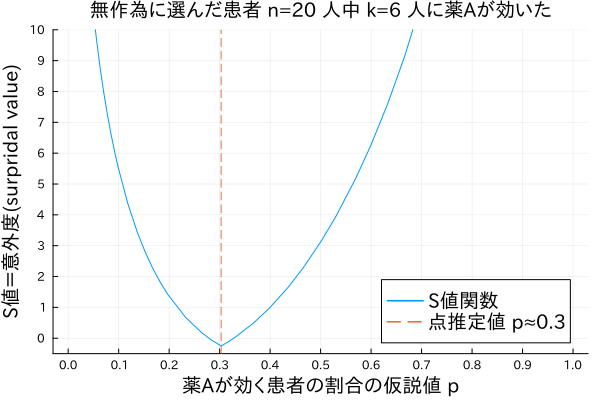

In [15]:
n, k = 20, 6
plot(p -> -log(2, pvalue_central(Binomial(n, p), k)), 0, 1; label="S値関数")
plot!(ylim=(-0.5, 10), legend=:bottomright)
plot!(xtick=0:0.1:1, ytick=0:10, yguide="S値＝意外度(surpridal value)")
title!("無作為に選んだ患者 n=$n 人中 k=$k 人に薬Aが効いた")
plot!(xguide="薬Aが効く患者の割合の仮説値 p")
vline!([0.303]; label="点推定値 p≈0.3", ls=:dash)

意外度が大きいことと相性が悪いことは同じ意味になり、S値＝意外度で表される意外度は偏りのないコイン投げで何回続けて表が出たかを意味しているのでした。

仮に偏りのないコイン投げで5回以上連続して表が出たときに「意外度が非常に大きい」＝「相性が非常に悪い」と言うことにすると、$p$ が $0.107$ 以下の場合と $0.564$ 以上の場合に「意外度が非常に大きい」＝「相性が非常に悪い」ということになります。(このとき、区間 $[0.107, 0.564]$ は $97\%$ 信頼区間＝相性区間になっている。信頼区間＝相性区間については次節を参照せよ。)

ただし、ここで考えているのは「無作為に選んだ患者 $n=20$ 人中 $k=6$ 人に薬Aが効いた」というデータの値と「薬Aが効く患者の割合は $p$ である」という仮説の相性の悪さです。

In [16]:
@show α = 0.5^5
@show 1 - α
@show confint_clopper_pearson(n, k; α);

α = 0.5 ^ 5 = 0.03125
1 - α = 0.96875
confint_clopper_pearson(n, k; α) = [0.10726583473679588, 0.564099648860263]


### 信頼区間＝相性区間

前節でP値関数から点推定値がP値関数を最大化するパラメータ $p$ の値として得られることを説明しました。

パラメータ $p$ の区間推定もP値関数から得られます。

そのためにはP値に関する閾値 $\alpha$ を用意して、$\op{pvalue}(k|n,p) \ge \alpha$ か否かで、パラメータ $p$ の値はデータの値 $n,k$ と相性が良い/悪いとみなすことにします。

伝統的な用語法で閾値 $\alpha$ は有意水準と呼ばれ、$1-\alpha$ は信頼水準(信頼度、信頼係数)と呼ばています。しかし、それらの伝統的用語法はP値がモデルとパラメータの値に関する仮説の組み合わせとデータの値の相性の良さ(compatibility)の尺度であるという見方と整合的ではないので、$\alpha$ を __相性水準 (compatibility level)__ と呼ぶことにします。

相性水準と呼ぶことにした閾値 $\alpha$ によってデータの値と相性が良いとみなされるパラメータ $p$ の値全体の集合をパラメータ $p$ の __相性区間 (compatibility interval)__ と呼ぶことにします。伝統的な用語法でこれは信頼水準 $1-\alpha$ の信頼区間と呼ばれるものと同じものになります。より詳しく述べると、我々が現在扱っているP値関数から得られる相性区間はClopper-Pearsonの信頼区間と同じものになります。

__Clopper-Pearsonの信頼区間について:__ Clopper-Pearsonの信頼区間にはコンピュータでの効率的な計算に適した明示公式が存在し、その公式を使って実装すると極めて簡単にかつ効率的に計算できます。

ただし、その事実を理解するためには二項分布とベータ分布の累積分布関数間の関係やベータ分布の累積分布関数が正則化不完全ベータ関数と呼ばれる有名な特殊関数にちょうどなっており、その逆関数の分位点関数もコンピュータで効率的に計算できることなどを学ぶ必要があります。数学的な事柄にも興味がある人は勉強してみると数学とコンピュータでの数値計算について沢山の教養が身に付くことでしょう。

この解説ではその点に深入りせずに、次の非常にシンプルなコードでClopper-Pearsonの信頼区間を計算できることを注意するにとどめておきます。

```julia
using Distributions
function confint_clopper_pearson(n, k; α = 0.05)
    p_L = k > 0 ? quantile(Beta(k, n-k+1), α/2) : zero(α)
    p_U = k < n ? quantile(Beta(k+1, n-k), 1-α/2) : one(α)
    [p_L, p_U]
end
```

このコードを用いて、「無作為に選んだ患者 n=20 人中 k=6 人に薬Aが効いた」というデータの値が得られたときの、相性水準 $5\%$ の相性区間(＝信頼水準 $95\%$ のCloper-Pearson信頼区間)を求めて見ましょう。

In [17]:
@show confint_clopper_pearson(20, 6; α = 0.05);

confint_clopper_pearson(20, 6; α = 0.05) = [0.11893159040572766, 0.5427891822762891]


「無作為に選んだ患者 n=20 人中 k=6 人に薬Aが効いた」というデータの値が得られたときの、相性水準 $5\%$ の相性区間(＝信頼水準 $95\%$ のCloper-Pearson信頼区間)はおおよそ $[0.119, 0.543]$ になることが分かりました。

相性水準 $5\%$ の相性区間は、P値に関する $5\%$ 以上という条件によって、「無作為に選んだ患者 n=20 人中 k=6 人に薬Aが効いた」というデータの値と相性が良いとみなされた「薬Aが効く患者の割合の仮説値 $p$」全体の集合になっています。

相性水準 $5\%$ の相性区間はP値関数のグラフを高さ $5\%$ で切断する線分に等しい。次のグラフを参照せよ。

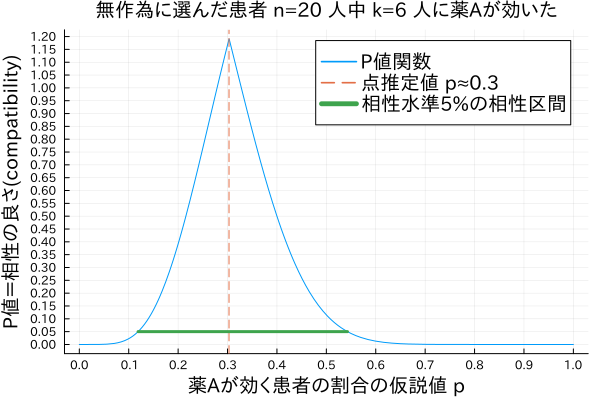

In [18]:
n, k, α = 20, 6, 0.05
ci = confint_clopper_pearson(n, k; α);
plot(p -> pvalue_central(Binomial(n, p), k), 0, 1; label="P値関数")
plot!(xtick=0:0.1:1, ytick=0:0.05:1.5, yguide="P値＝相性の良さ(compatibility)")
title!("無作為に選んだ患者 n=$n 人中 k=$k 人に薬Aが効いた")
plot!(xguide="薬Aが効く患者の割合の仮説値 p")
vline!([0.303]; label="点推定値 p≈0.3", ls=:dash)
plot!(ci, fill(α, 2); label="相性水準5%の相性区間", lw=3)

このように、P値(より正確にはP値関数)の概念から、点推定値と区間推定の両方が得られる。

S値のグラフにも相性区間を描きこむと次のようになる。相性水準 $5\%$ の相性区間は、S値関数のグラフを高さ $-\log_2 0.05 \approx 4.3$ で切断する線分になる。

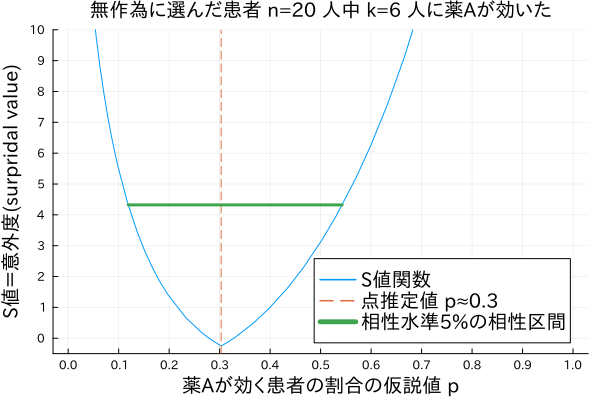

In [19]:
n, k = 20, 6
plot(p -> -log(2, pvalue_central(Binomial(n, p), k)), 0, 1; label="S値関数")
plot!(ylim=(-0.5, 10), legend=:bottomright)
plot!(xtick=0:0.1:1, ytick=0:10, yguide="S値＝意外度(surpridal value)")
title!("無作為に選んだ患者 n=$n 人中 k=$k 人に薬Aが効いた")
plot!(xguide="薬Aが効く患者の割合の仮説値 p")
vline!([0.303]; label="点推定値 p≈0.3", ls=:dash)
plot!(ci, fill(-log(2, α), 2); label="相性水準5%の相性区間", lw=3)

### 報告の仕方について

P値関数やS値関数のグラフは、各検定仮説のP値の情報だけではなく、点推定値と区間推定値の情報も含みます。だから、原理的にはP値関数のグラフを報告に載せれば特定の検定仮説のP値や点推定値や区間推定値を報告する必要はないと考えられます。

しかし、報告の読者の便のためには、重要だと考えられる検定仮説達のP値と点推定値と区間推定値も報告に載せた方が親切でしょう。

統計学ユーザー界には「有意差あり/なし」と報告したがる伝統的な悪習があるのですが、それを真似する必要はありません。英語の報告では significant の語の使用を控えることは現代的な良いスタイルだということになります。P値の具体的な値を報告していれば、読者の各々が自分の目的に適切な閾値を設定して二分法的な判断を自分でできます。

「有意差あり(P<0.05)」と「有意差なし(P≥0.05)」のように報告には書くべきではありません。報告を書く側はP値以外のあらゆる情報を加味して暫定的な結論を述べるべきです。

統計学ユーザー界には「差はゼロ」や「効果はゼロ」を意味する特殊な検定仮説(それを __ゼロ仮説__ と呼ぶことにする)のP値のみを報告する悪しき伝統があります。その悪しき伝統は上で示したようにP値が推定の道具としても使えることを見逃す原因になっています。そういう悪習にも従う必要はありません。

例えば、「効果はゼロ」を意味するゼロ仮説のP値だけではなく、事前に予想していた効果の大きさやそれまでの定説の値 $a$ について「効果は $a$ である」という検定仮説のP値も計算して報告するのは良いスタイルです。

## 二項検定の複数のP値のグラフ

このノートブックでは上の方で以下の4種類のP値関数を定義している。

* Clopper-Pearsonの信頼区間を与える片側確率の2倍版のP値関数 (central法)
* Sterneの信頼区間を与えるP値関数 (minlike法)
* Wilsonの信頼区間を与える二項分布の正規分布を使うP値関数 (score法)
* Waldの信頼区間を与えるP値関数 (Wald法)

「無作為に選んだ患者 n=20 人中 k=6 人に薬Aが効いた」というデータの値に関するこれらのグラフを得てみよう。

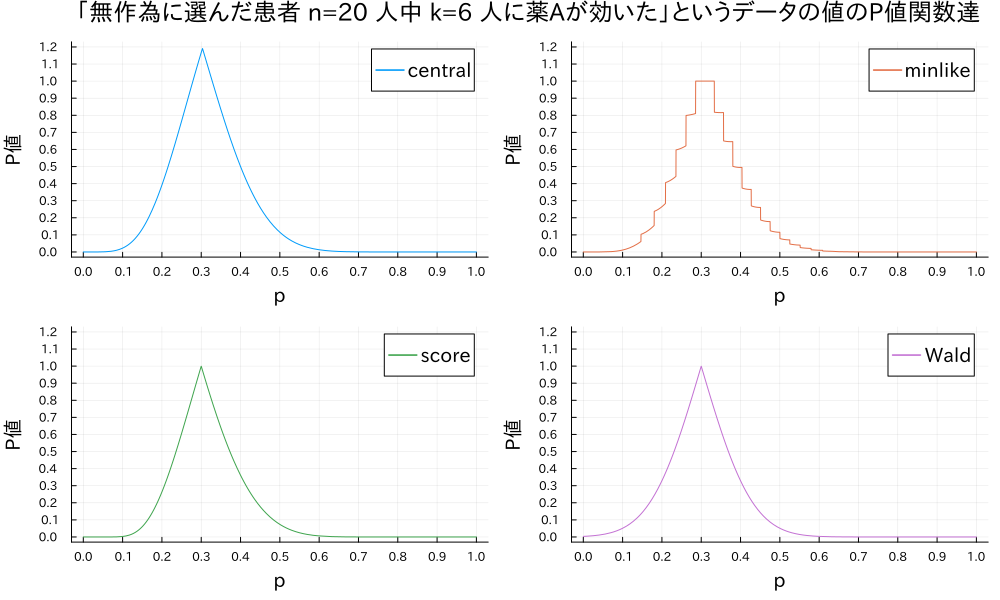

In [20]:
n, k = 20, 6
P1 = plot(p -> pvalue_central(Binomial(n, p), k); label="central", c=1)
P2 = plot(p -> pvalue_minlike(Binomial(n, p), k); label="minlike", c=2)
P3 = plot(p -> pvalue_score(Binomial(n, p), k); label="score", c=3)
P4 = plot(p -> pvalue_wald(Binomial(n, p), k); label="Wald", c=4)
plot(P1, P2, P3, P4; size=(1000, 600), layout=(2, 2))
plot!(xtick=0:0.1:1, ytick=0:0.1:1.2, ylim=(-0.03, 1.23))
plot!(xguide="p", yguide="P値")
plot!(plot_title="「無作為に選んだ患者 n=$n 人中 k=$k 人に薬Aが効いた」というデータの値のP値関数達")
plot!(leftmargin=4Plots.mm, bottommargin=4Plots.mm)

$n=20$, $k=6$ のような小さなデータでは上のグラフのよう4種のP値関数がかなり異なります。

しかし、$n=200$, $k=60$ の場合には以下のように4種のP値関数のグラフの違いは目立たなくなります。

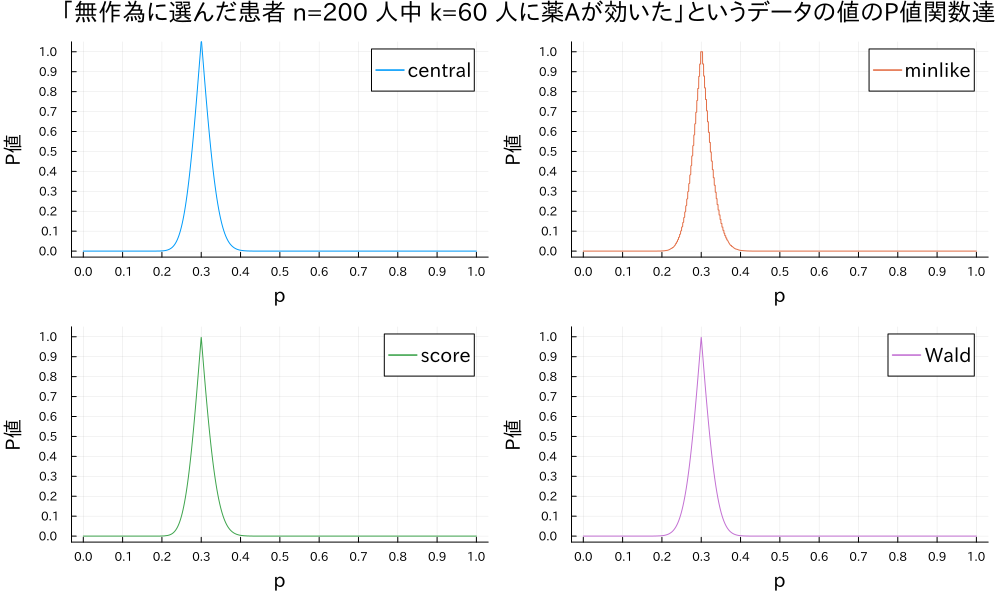

In [21]:
n, k = 200, 60
P1 = plot(p -> pvalue_central(Binomial(n, p), k); label="central", c=1)
P2 = plot(p -> pvalue_minlike(Binomial(n, p), k); label="minlike", c=2)
P3 = plot(p -> pvalue_score(Binomial(n, p), k); label="score", c=3)
P4 = plot(p -> pvalue_wald(Binomial(n, p), k); label="Wald", c=4)
plot(P1, P2, P3, P4; size=(1000, 600), layout=(2, 2))
plot!(xtick=0:0.1:1, ytick=0:0.1:1.5, ylim=(-0.03, 1.05))
plot!(xguide="p", yguide="P値")
plot!(plot_title="「無作為に選んだ患者 n=$n 人中 k=$k 人に薬Aが効いた」というデータの値のP値関数達")
plot!(leftmargin=4Plots.mm, bottommargin=4Plots.mm)